# Handwritten MNIST

Tutorial: [codebasics](https://github.com/codebasics/deep-learning-keras-tf-tutorial/blob/master/16_cnn_cifar10_small_image_classification/cnn_mnist_exercise_solution.ipynb)

In [19]:
from tensorflow.keras import datasets, layers, models
from tensorflow import keras
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [20]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [21]:
X_train.shape

(60000, 28, 28)

In [22]:
X_test.shape

(10000, 28, 28)

In [23]:
X_train[0].shape

(28, 28)

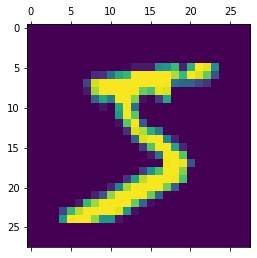

In [24]:
plt.matshow(X_train[0])

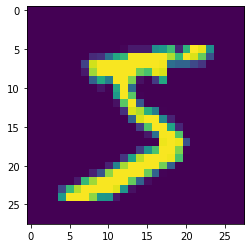

In [25]:
plt.imshow(X_train[0])

In [26]:
y_train[0]

5

## Normalization

In [27]:
X_train = X_train/255
X_test = X_test /255

## ANN

In [28]:
ann = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(100, activation='relu'),
        keras.layers.Dense(10, activation='sigmoid')
      ])

ann.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

ann.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [29]:
hist_ann = ann.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2773 - accuracy: 0.9221
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1285 - accuracy: 0.9621
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0902 - accuracy: 0.9729
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0689 - accuracy: 0.9787
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0534 - accuracy: 0.9837
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0438 - accuracy: 0.9859
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0355 - accuracy: 0.9891
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0291 - accuracy: 0.9913
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0240 - accuracy: 0.9923
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.020

In [30]:
ann.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0810 - accuracy: 0.9784


[0.08102654665708542, 0.9783999919891357]

In [35]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_train.shape

(60000, 28, 28, 1)

In [32]:
X_test = X_test.reshape(-1, 28, 28, 1)
X_test.shape

(10000, 28, 28, 1)

## CNN

In [34]:
cnn = keras.Sequential([
        layers.Conv2D(30, (3, 3), activation='relu',
                      input_shape=(28, 28, 1)),
        layers.MaxPool2D((2,2)),

        layers.Flatten(),
        layers.Dense(100, activation='relu'),
        keras.layers.Dense(10, activation='sigmoid')
])

cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

cnn.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 30)        300       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 30)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 5070)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 100)               507100    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1010      
Total params: 508,410
Trainable params: 508,410
Non-trainable params: 0
_________________________________________________________________


In [36]:
hist_cnn = cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 32s 2ms/step - loss: 0.1525 - accuracy: 0.9549
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0513 - accuracy: 0.9846
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0329 - accuracy: 0.9898
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0224 - accuracy: 0.9933
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0143 - accuracy: 0.9955
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0099 - accuracy: 0.9970
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0073 - accuracy: 0.9977
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0061 - accuracy: 0.9980
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0048 - accuracy: 0.9985
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.00

In [37]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [40]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0566 - accuracy: 0.9867


[0.056629933416843414, 0.9866999983787537]

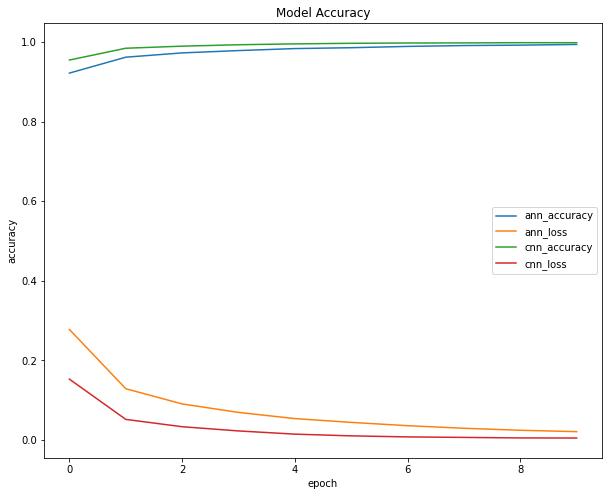

In [45]:
plt.figure(figsize=(10,8))
plt.plot(hist_ann.history['accuracy'])
plt.plot(hist_ann.history['loss'])

plt.plot(hist_cnn.history['accuracy'])
plt.plot(hist_cnn.history['loss'])

plt.title("Model Accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(['ann_accuracy', 'ann_loss', 'cnn_accuracy', 'cnn_loss'], loc='best')
plt.show()